### 사전 준비

In [1]:
# 기본 패키지
import numpy as np # 수치 해석, 선형대수 계산 기능 제공. 수학 연산을 위한 기능(=numeric python)
import pandas as pd # 데이터 프레임 자료 제공을 위한 패키지
import scipy as sp # 고급 수학 함수, 수치적 미적분, 방정식 등 사용할 때 쓰는 패키지

import matplotlib as mpl # matplotlib이랑 seaborn은 차트를 그리기 위한 세트 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 머신러닝 패키지 import
import statsmodels.api as sm 
import sklearn as sk

In [3]:
# 한글 설정, 마이너스 표시 가능하게 하기
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font = 'Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 전체 데이터 로드

In [4]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
               11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
               475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
               575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
               920.0, 955.0, 925.0, 975.0, 950.0,6.7, 7.5, 7.0, 9.7, 9.8,
               8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

### numpy 팁

In [5]:
# column_stack() 함수 사용 (=pandas dataframe이랑 거의 비슷함)
# 두 리스트를 2차원 배열로 만드는 작업
np.column_stack(([1,2,3],[4,5,6]))


array([[1, 4],
       [2, 5],
       [3, 6]])

### 생선 데이터로 돌아가서

In [6]:
temp_data = np.row_stack((fish_length, fish_weight))
temp_data # 길이 따로, 무게 따로 묶임. 이건 안쓸거임

array([[  25.4,   26.3,   26.5,   29. ,   29. ,   29.7,   29.7,   30. ,
          30. ,   30.7,   31. ,   31. ,   31.5,   32. ,   32. ,   32. ,
          33. ,   33. ,   33.5,   33.5,   34. ,   34. ,   34.5,   35. ,
          35. ,   35. ,   35. ,   36. ,   36. ,   37. ,   38.5,   38.5,
          39.5,   41. ,   41. ,    9.8,   10.5,   10.6,   11. ,   11.2,
          11.3,   11.8,   11.8,   12. ,   12.2,   12.4,   13. ,   14.3,
          15. ],
       [ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
         450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
         700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
         700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
         925. ,  975. ,  950. ,    6.7,    7.5,    7. ,    9.7,    9.8,
           8.7,   10. ,    9.9,    9.8,   12.2,   13.4,   12.2,   19.7,
          19.9]])

In [7]:
# [[l,w]] for l,w in zip(fish_length, fish_weight) 사용 안하고 하는 방법
fish_data = np.column_stack((fish_length, fish_weight))
fish_data # 길이랑 무게랑 한 쌍으로 묶임. 데이터를 두 개의 변수로 tuple형태로 넣은 것

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [8]:
np.ones(35)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [9]:
np.zeros(14)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
# np.ones(5) # 1이 5개 나옴, np.zeros(6) #0이 6개 나옴
fish_target = np.concatenate((np.ones(35),np.zeros(14))) # 위 두개를 하나로 합친 것
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 사이킷런 함수 
**train_test_split()**


In [11]:
# 훈련세트, 테스트세트 분리하는 함수
from sklearn.model_selection import train_test_split

In [12]:
# random_state 42
# train_input
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [13]:
train_input

array([[  30. ,  450. ],
       [  29. ,  363. ],
       [  29.7,  500. ],
       [  11.3,    8.7],
       [  11.8,   10. ],
       [  13. ,   12.2],
       [  32. ,  600. ],
       [  30.7,  500. ],
       [  33. ,  700. ],
       [  35. ,  700. ],
       [  41. ,  975. ],
       [  38.5,  920. ],
       [  25.4,  242. ],
       [  12. ,    9.8],
       [  39.5,  925. ],
       [  29.7,  450. ],
       [  37. , 1000. ],
       [  31. ,  500. ],
       [  10.5,    7.5],
       [  26.3,  290. ],
       [  34. ,  685. ],
       [  26.5,  340. ],
       [  10.6,    7. ],
       [   9.8,    6.7],
       [  35. ,  680. ],
       [  11.2,    9.8],
       [  31. ,  475. ],
       [  34.5,  620. ],
       [  33.5,  610. ],
       [  15. ,   19.9],
       [  34. ,  575. ],
       [  30. ,  390. ],
       [  11.8,    9.9],
       [  32. ,  600. ],
       [  36. ,  850. ],
       [  11. ,    9.7]])

In [14]:
train_target

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0.])

In [15]:
test_input.shape

(13, 2)

In [16]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

##### fish_target 값을 **계층화(stratify)** 비율을 맞춰서 분할

In [17]:
train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target,
random_state=42, stratify=fish_target)

In [18]:
# test_target의 값 재확인
# 2.25:1 변경
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

#### 수상한 도미!

length 25cm/ weight 150g

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
kn = KNeighborsClassifier() # 객체 생성
kn.fit(X=train_input, y=train_target) # X는 입력 변수, y는 종속 변수, 훈련 실시

KNeighborsClassifier()

In [21]:
kn.score(X=test_input, y=test_target) # 정확도 1.0 -> 100% 정확하다

1.0

In [22]:
# 도미값 입력해서 예측
kn.predict([[25.0, 150.0]]) # 빙어라고 뜸

array([0.])

### 산점도를 통해서 왜 도미 데이터가 빙어로 나왔는지 알아보기

In [23]:
weird_bream = np.array([25.0,150.0])
weird_bream

array([ 25., 150.])

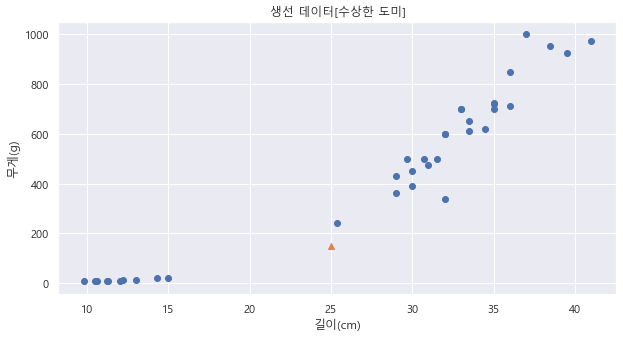

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0],y=train_input[:,1])
plt.title('생선 데이터[수상한 도미]')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.scatter(x=weird_bream[0],y=weird_bream[1], marker='^') # 수상한 도미 데이터 넣음
plt.show()


##### k-최근접 이웃을 찾아주는 함수
**kneighbors()**

In [25]:
distance, indices = kn.kneighbors([weird_bream])

In [26]:
distance # 수상한 도미와 5개의 값이 떨어진 거리값, 제일 가까운 첫번째 값만 도미고 나머지는 빙어임

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [27]:
indices # array 중 해당 번째 수의 값과 최근접 이웃이라고 보여줌(1번째, 21번째...의 값)

array([[21, 33, 19, 30,  1]], dtype=int64)

In [28]:
train_input[indices] # indices의 실제 수치

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

#### 찾아낸 이웃 값들을 산점도에 표시

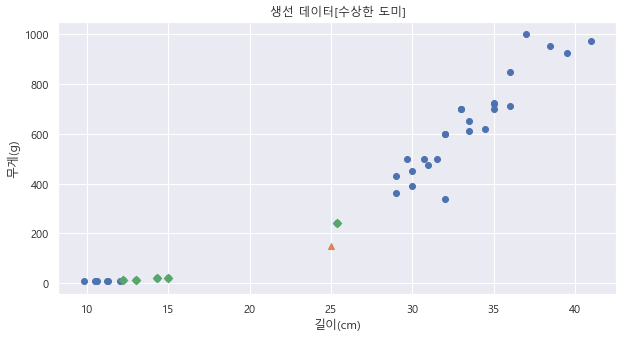

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0], y=train_input[:,1]) # 전체 생선 데이터
plt.scatter(x=weird_bream[0], y=weird_bream[1], marker='^') # 수상한 도미 데이터
plt.scatter(x=train_input[indices,0], y=train_input[indices,1], marker='D') # 최근접 이웃을 초록색으로 나타냄
plt.title('생선 데이터[수상한 도미]')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
# 5개 중 하나 빼고 다 빙어 쪽으로 몰림, 그래서 수상한 도미가 빙어라고 뜸

plt.show()

#### 도미가 빙어로 나오는 이유
x축은 단위가 5로, y축은 단위가 200으로 단위 차이가 커서 정확도가 100%여도 도미가 빙어로 나옴

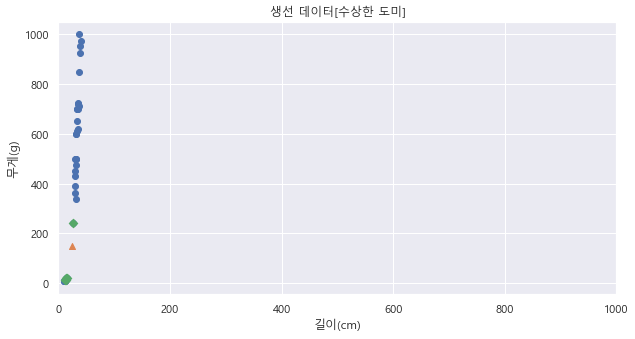

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0], y=train_input[:,1]) 
plt.scatter(x=weird_bream[0], y=weird_bream[1], marker='^') 
plt.scatter(x=train_input[indices,0], y=train_input[indices,1], marker='D') 

plt.xlim((0,1000)) # x축 좌표를 1000까지 늘림
plt.title('생선 데이터[수상한 도미]')
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')


plt.show()

#### 특성치 단위를 맞춰주는 데이터 전처리가 필요하다!

In [31]:
# 훈련세트 데이터의 전체 평균
mean = np.mean(a=train_input,axis=0) # axis=0 or axis=columns는 각 컬럼별로 평균값이 나오게 함
mean

array([ 27.29722222, 454.09722222])

생선 길의 평균 -> 27.2972

생선 무게 평균 -> 454.0972

In [32]:
# 훈련 세트 데이터의 전체 표준편차
std = np.std(a=train_input, axis=0)
std

array([  9.98244253, 323.29893931])

생선 길의 표준편차 -> 9.9824

생선 무게 표준편차 -> 323.2989

In [33]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


##### 표준점수 도출
- 도출한 평균과 표준편차로 변경된 스케일 데이터를 추출
    - 스케일 세트 = (실체값 - 평균) / 표준편차

In [34]:
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

#### 재훈련

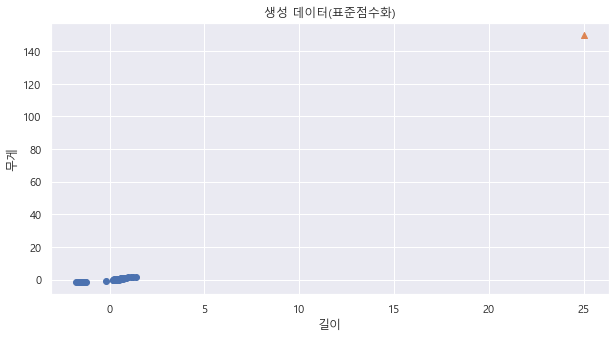

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_scaled[:,0], y=train_scaled[:,1])
plt.scatter(x=weird_bream[0],y=weird_bream[1], marker='^') # 예측 도미값은 표준점수화 하지 않음!

plt.title('생성 데이터(표준점수화)')
plt.xlabel('길이')
plt.ylabel('무게')

plt.show()


#### weired bream도 표준점수화가 필요

In [36]:
std_weird_bream = (weird_bream - mean) / std
std_weird_bream

array([-0.23012627, -0.94060693])

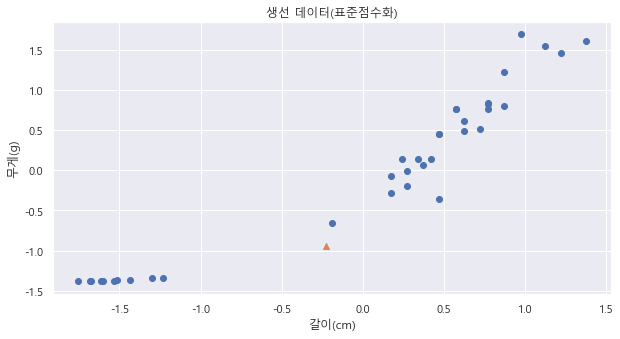

In [37]:
plt.figure(figsize=(10, 5))
plt.scatter(x=train_scaled[:,0], y=train_scaled[:,1])
plt.scatter(x=std_weird_bream[0], y=std_weird_bream[1], marker='^')

plt.title('생선 데이터(표준점수화)')
plt.xlabel('갈이(cm)')
plt.ylabel('무게(g)')
plt.show()

In [38]:
train_target

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1.])

In [40]:
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [39]:
kn.fit(X=train_scaled, y=train_target)

KNeighborsClassifier()

In [41]:
test_input # 얘도 표준편차화 해야함

array([[ 11. ,   9.7],
       [ 11.8,   9.9],
       [ 29.7, 450. ],
       [ 11.8,  10. ],
       [ 26.5, 340. ],
       [ 12.4,  13.4],
       [ 34. , 685. ],
       [ 34. , 575. ],
       [ 38.5, 920. ],
       [ 35. , 680. ],
       [ 26.3, 290. ],
       [ 31. , 500. ],
       [ 41. , 950. ]])

In [42]:
## 테스트셋을 표준점수화 시키지 않으면 문제 발생
kn.score(X=test_input, y=test_target)

0.6923076923076923

In [43]:
#테스트 세트도 표준 점수화
test_scaled = (test_input - mean) / std
test_scaled

array([[-1.63258863, -1.37457062],
       [-1.55244793, -1.37395199],
       [ 0.24070039, -0.01267317],
       [-1.55244793, -1.37364268],
       [-0.07986244, -0.35291555],
       [-1.4923424 , -1.3631261 ],
       [ 0.67145669,  0.71420828],
       [ 0.67145669,  0.3739659 ],
       [ 1.12224816,  1.44108972],
       [ 0.77163257,  0.69874271],
       [-0.09989762, -0.50757117],
       [ 0.37092904,  0.14198246],
       [ 1.37268787,  1.5338831 ]])

In [44]:
kn.score(X=test_scaled, y=test_target) # 정확도는 1.0 이다

1.0

In [46]:
# 재예측
kn.predict(X=[std_weird_bream])
# 도미로 제대로 나옴!
# std_weird_bream은 대괄호가 하나라서 대괄호 하나 넣고 predict 해야함

array([1.])

#### 산점도에서 다시 확인

In [48]:
dist, inds = kn.kneighbors([std_weird_bream])
print((dist,inds)) # 앞에 나온 index 값과 다른 결과가 나옴(21,33,19,30,1 이었음)

(array([[0.2873737 , 0.7711188 , 0.89552179, 0.91493515, 0.95427626]]), array([[21, 14, 34, 32,  5]], dtype=int64))


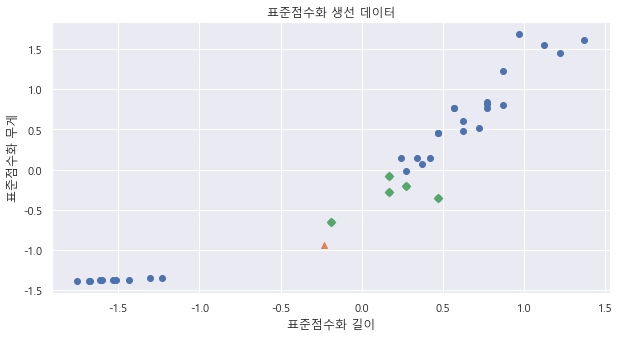

In [52]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_scaled[:,0], y=train_scaled[:,1])
plt.scatter(x=std_weird_bream[0],y=std_weird_bream[1], marker='^')
plt.scatter(x=train_scaled[inds,0],y=train_scaled[inds,1], marker='D')

plt.title('표준점수화 생선 데이터')
plt.xlabel('표준점수화 길이')
plt.ylabel('표준점수화 무게')

plt.show()

In [53]:
new_smelt = np.array([[10.0,8.7]])
std_new_smelt = (new_smelt - mean) / std
std_new_smelt

array([[-1.73276452, -1.37766373]])

In [57]:
kn.predict(X =std_new_smelt)
# std_new_smelt는 위에 보면 이미 대괄호가 두개라서 대괄호 안넣고 predict 해야함
# 빙어로 잘 나온다!

array([0.])